In [2]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import lib.general_utilities as gu

# storing data directories for this notebook.
img_out_dir = 'data/images/LDA_analysis_NB5/'
data_out_dir = 'data/pickled/LDA_analysis_NB5/'

%matplotlib inline

In [45]:
filename = 'data/pulled_tweets/PT_all_airlines_df'
air_df = gu.read_pickle_obj(filename)

In [46]:
air_df.columns

Index(['date', 'text'], dtype='object')

In [47]:
air_df.head(10)

date                                               text
4   2017-12-13 18:59:51  This is amazing.  I am so happy!  12 global up...
5   2017-12-13 18:53:36  @united YESSSSSSSSSSSSSSSSSSSSSSSSSSS!  I don'...
6   2017-12-13 18:39:43  RT @ARIELnolastname: First US carrier since Pa...
7   2017-12-13 18:35:45  Being nagged over and over and over about bag ...
8   2017-12-13 18:25:37  Wow - don’t fly business with #UnitedAirlines....
9   2017-12-13 18:15:36  First US carrier since Pan Am to fly non-stop ...
10  2017-12-13 18:06:22  United Airlines Announces Service Between San ...
11  2017-12-13 16:09:20  2017: #Trump, Woman's March, #Protests, #TheWa...
12  2017-12-13 16:05:19  #SIU #Aviation #Alumni #jobs\n#AirEvac Lifetea...
13  2017-12-13 15:58:52  @chefkelcheung @AmericanAir Hi there. This is ...

In [22]:
#!pip install gensim

In [23]:
import gensim
import re
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [24]:
import nltk
#nltk.download('wordnet')

In [25]:
# load stopwords and exclude punctuation sets.
stop = set(stopwords.words('english'))
exclude_punctuation = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [26]:
def tokenize(text):
    return(text.split())

In [27]:
def process_doc(text):
    
    rem_stop = " ".join([i for i in text.lower().split() if i not in stop])
    text = " ".join(lemma.lemmatize(word) for word in rem_stop.split())
    
    return(text)

In [30]:
def cleaner(text):
    # convert text to lowercase.
    text = text.lower()
    # remove www.* or https?://* to URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    # remove @username to AT_USER
    text = re.sub('@[^\s]+','',text)
    # remove additional white spaces
    text = re.sub('[\s]+', ' ', text)
    # Replace #word with word
    text = re.sub(r'#([^\s]+)', r'\1', text)
    # remove some punctuation symbols.
    text= ''.join(ch for ch in text if ch not in exclude_punctuation)
    # clean numbers.
    text = re.sub('&#39;','',text).lower()
    # trim
    text = text.strip('\'"')
    # trim any leading or trailing white spaces.
    text = text.strip()

    return(text)

In [48]:
air_df['clean_text'] = air_df['text'].apply(cleaner)

In [49]:
# Corpus of documents, each doc is a tweet. 
# I used stemming earlier, where it finds the stem of the words by truncating the ends.
# Lemmatization is a more elegant way of doing this 'normalization". It finds the root of
# the word.
air_df['lemma_stopw_clean_text'] = air_df['clean_text'].apply(process_doc)

In [50]:
air_df[['text', 'clean_text', 'lemma_stopw_clean_text']][:15]

text  \
4   This is amazing.  I am so happy!  12 global up...   
5   @united YESSSSSSSSSSSSSSSSSSSSSSSSSSS!  I don'...   
6   RT @ARIELnolastname: First US carrier since Pa...   
7   Being nagged over and over and over about bag ...   
8   Wow - don’t fly business with #UnitedAirlines....   
9   First US carrier since Pan Am to fly non-stop ...   
10  United Airlines Announces Service Between San ...   
11  2017: #Trump, Woman's March, #Protests, #TheWa...   
12  #SIU #Aviation #Alumni #jobs\n#AirEvac Lifetea...   
13  @chefkelcheung @AmericanAir Hi there. This is ...   
14  Biggest stories of 2017: United Airlines https...   
15  Note from the captain is a nice touch #unitedA...   
16  I think airlines should give a $5 credit if yo...   
17  RT @UditSheth: #GujaratModel of success being ...   
18  RT @UditSheth: #GujaratModel of success being ...   

                                           clean_text  \
4   this is amazing i am so happy 12 global upgrad...   
5   yesssssssssssssssssssssssssss i dont know how ...   
6   rt first us carrier since pan am to fly nonsto...   
7   being nagged over and over and over about bag ...   
8   wow  don’t fly business with unitedairlines ap...   
9   first us carrier since pan am to fly nonstop t...   
10  united airlines announces service between san ...   
11  2017 trump womans march protests thewall trave...   
12  siu aviation alumni jobs airevac lifeteam colu...   
13       hi there this is unitedairlines hold my beer   
14  biggest stories of 2017 united airlines commen...   
15  note from the captain is a nice touch unitedai...   
16  i think airlines should give a 5 credit if you...   
17  rt gujaratmodel of success being followed by u...   
18  rt gujaratmodel of success being followed by u...   

                               lemma_stopw_clean_text  
4   amazing happy 12 global upgrade use next year ...  
5   yes dont know today get better amazing thankyo...  
6   rt first u carrier since pan fly nonstop tahit...  
7   nagged bag stowage boarding horrible im sure l...  
8   wow don’t fly business unitedairlines apparent...  
9   first u carrier since pan fly nonstop tahitiit...  
10  united airline announces service san francisco...  
11  2017 trump woman march protest thewall travelb...  
12  siu aviation alumnus job airevac lifeteam colu...  
13                        hi unitedairlines hold beer  
14  biggest story 2017 united airline comment unit...  
15  note captain nice touch unitedairlines starall...  
16  think airline give 5 credit check bag charge 1...  
17  rt gujaratmodel success followed unitedairline...  
18  rt gujaratmodel success followed unitedairline...

In [52]:
# pickle this dataframe that has an added column with 'lemmatized' text.
filename = 'data/processed_dataset_df/pulledTweetsCleanedLemma_df'
gu.pickle_obj(filename, air_df)

## Gensim LDA

In [53]:
doc_clean = air_df['lemma_stopw_clean_text']
# Corpus is in string format and doc2bow array expects tokens. Let's tokenize doc strings.
doc_clean = doc_clean.apply(tokenize)
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [54]:
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

In [55]:
# Creating the object for LDA model.
Lda = LdaModel

In [56]:
lda_model = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [57]:
# Pickle lda model.
gu.pickle_obj(data_out_dir+'lda_transf_PulledTweets.obj', Lda)

# Pickle lda dictionary.
gu.pickle_obj(data_out_dir+'lda_dictionary_PulledTweets.obj', dictionary)

# Pickle lda transformed corpus.
gu.pickle_obj(data_out_dir+'lda_model_PulledTweets.obj', lda_model)

In [58]:
print(lda_model.print_topics(num_topics=10, num_words=10))

[(0, '0.041*"americanairlines" + 0.017*"unitedairlines" + 0.011*"flight" + 0.011*"rt" + 0.008*"united" + 0.008*"airline" + 0.008*"first" + 0.008*"plane" + 0.007*"travel" + 0.006*"airport"'), (1, '0.067*"southwestairlines" + 0.060*"job" + 0.037*"agent" + 0.029*"apply" + 0.026*"dallas" + 0.023*"ramp" + 0.016*"parttime" + 0.013*"americanairlines" + 0.011*"unitedairlines" + 0.010*"hiring"'), (2, '0.029*"americanairlines" + 0.025*"airline" + 0.018*"flight" + 0.017*"unitedairlines" + 0.015*"rt" + 0.010*"southwestairlines" + 0.009*"jetblue" + 0.008*"travel" + 0.008*"american" + 0.007*"customer"'), (3, '0.033*"americanairlines" + 0.031*"flight" + 0.024*"rt" + 0.023*"unitedairlines" + 0.010*"terminal" + 0.010*"united" + 0.010*"starting" + 0.009*"houston" + 0.008*"b" + 0.008*"change"'), (4, '0.034*"americanairlines" + 0.025*"jetblue" + 0.022*"one" + 0.020*"way" + 0.019*"travel" + 0.015*"rt" + 0.014*"suzzstravels" + 0.014*"departing" + 0.012*"jfk" + 0.008*"flight"'), (5, '0.048*"jetblue" + 0.023*

In [59]:
topics_df = pd.DataFrame(lda_model.print_topics(num_topics=10, num_words=10))

In [60]:
topics_df.drop(0, axis = 1, inplace=True)

In [61]:
topics_df[:15]

1
0  0.041*"americanairlines" + 0.017*"unitedairlin...
1  0.067*"southwestairlines" + 0.060*"job" + 0.03...
2  0.029*"americanairlines" + 0.025*"airline" + 0...
3  0.033*"americanairlines" + 0.031*"flight" + 0....
4  0.034*"americanairlines" + 0.025*"jetblue" + 0...
5  0.048*"jetblue" + 0.023*"flight" + 0.019*"amer...
6  0.026*"americanairlines" + 0.012*"plane" + 0.0...
7  0.024*"americanairlines" + 0.017*"flight" + 0....
8  0.025*"americanairlines" + 0.013*"american" + ...
9  0.026*"americanairlines" + 0.020*"southwestair...

In [62]:
topic = topics_df.iloc[0,:]

In [63]:
topic_lst=topic.tolist()

In [64]:
topic_lst

['0.041*"americanairlines" + 0.017*"unitedairlines" + 0.011*"flight" + 0.011*"rt" + 0.008*"united" + 0.008*"airline" + 0.008*"first" + 0.008*"plane" + 0.007*"travel" + 0.006*"airport"']

In [185]:
#!pip install pyLDAvis

In [65]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [66]:
vis_data = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis_data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      15.034486        1       1 -0.051991 -0.156109
5      14.572270        1       2 -0.042868  0.067768
1      12.791315        1       3  0.286138 -0.004162
0      11.198891        1       4 -0.039291 -0.077044
2      10.921881        1       5 -0.013744 -0.041543
4       8.210339        1       6 -0.078206  0.111966
8       7.400446        1       7 -0.057230 -0.030177
7       7.001836        1       8 -0.009917  0.087550
6       6.734212        1       9 -0.001118  0.006877
9       6.134325        1      10  0.008227  0.034875, topic_info=     Category        Freq               Term       Total  loglift  logprob
term                                                                      
97    Default  156.000000                job  156.000000  30.0000  30.0000
131   Default  302.000000  southwestairlines  302.000000  29.0000  29.0000
175   Default  105.000000              agent  105.000000  28.0000  28.0000
3451  Default   75.000000              apply   75.000000  27.0000  27.0000
1620  Default   70.000000             dallas   70.000000  26.0000  26.0000
3074  Default   61.000000               ramp   61.000000  25.0000  25.0000
292   Default  279.000000            jetblue  279.000000  24.0000  24.0000
3502  Default   41.000000           parttime   41.000000  23.0000  23.0000
242   Default   58.000000                one   58.000000  22.0000  22.0000
528   Default   41.000000                way   41.000000  21.0000  21.0000
4358  Default   24.000000       suzzstravels   24.000000  20.0000  20.0000
1945  Default   24.000000          departing   24.000000  19.0000  19.0000
53    Default  166.000000            airline  166.000000  18.0000  18.0000
2356  Default   23.000000               golf   23.000000  17.0000  17.0000
122   Default  542.000000   americanairlines  542.000000  16.0000  16.0000
256   Default   81.000000              plane   81.000000  15.0000  15.0000
2288  Default   29.000000           starting   29.000000  14.0000  14.0000
3312  Default   31.000000               game   31.000000  13.0000  13.0000
153   Default  117.000000             travel  117.000000  12.0000  12.0000
3480  Default   26.000000             hiring   26.000000  11.0000  11.0000
9     Default  236.000000     unitedairlines  236.000000  10.0000  10.0000
4191  Default   27.000000         getpacking   27.000000   9.0000   9.0000
8     Default   74.000000             united   74.000000   8.0000   8.0000
1569  Default   28.000000                jfk   28.000000   7.0000   7.0000
338   Default   70.000000                new   70.000000   6.0000   6.0000
1676  Default   30.000000                  b   30.000000   5.0000   5.0000
160   Default   31.000000            houston   31.000000   4.0000   4.0000
1510  Default   80.000000           american   80.000000   3.0000   3.0000
398   Default   43.000000           terminal   43.000000   2.0000   2.0000
1627  Default   23.000000                  🛫   23.000000   1.0000   1.0000
...       ...         ...                ...         ...      ...      ...
1485  Topic10    2.321953            horizon    3.898035   2.2732  -6.2834
1148  Topic10    2.321914         commercial    3.898037   2.2732  -6.2834
3254  Topic10    2.319877     congratulation    3.894720   2.2732  -6.2843
239   Topic10   10.198506               last   31.274563   1.6707  -4.8035
1332  Topic10    4.568799               news   10.335593   1.9749  -5.6065
379   Topic10    6.709077            chicago   19.785632   1.7098  -5.2223
3538  Topic10    3.070964                swa    6.263490   2.0785  -6.0038
521   Topic10    3.647189               late    9.439110   1.8404  -5.8318
1442  Topic10    3.816110                fun   10.261574   1.8021  -5.7865
185   Topic10    7.042638               gate   31.101118   1.3060  -5.1738
131   Topic10   24.718414  southwestairlines  302.396229   0.2871  -3.9182
356   Top

In [67]:
img_out_dir

'data/images/LDA_analysis_NB5/'

In [68]:
pyLDAvis.save_html(vis_data,img_out_dir+'lda_vis_pulled_tweets.html')

In [ ]:
# credit: https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html

## Sklearn LDA

In [57]:
filename = 'data/pulled_tweets/PT_all_airlines_df'
air_df = gu.read_pickle_obj(filename)

In [69]:
air_df.columns

Index(['date', 'text', 'clean_text', 'lemma_stopw_clean_text'], dtype='object')

In [70]:
def display_topics(model, feature_names, file2saveTopicPlot, no_words = 10, plot = False, plot_dim=(5,2)):
    
    topics_tokens = []
    
    for topic_idx, topic in enumerate(model.components_):

        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])
        
        topic_words = [(token, counts)
                       for token, counts in topic[:-no_words - 1:-1]]
        
        topics_tokens.append(topic_words)
        
        if not plot:
            print ("Topic %d:" % (topic_idx))
            print (topic_words)
        
    
    if plot:
        
        plot_matrix = np.arange(10).reshape(5,2)
    
        fig, ax = plt.subplots(figsize=(10, 10), nrows=5, ncols=2)
        
        topics = [
            {key: value for key, value in topic} 
                  for topic in topics_tokens
        ]
        
        row = 0
        
        for topic_id, topic in enumerate(topics):
            
            column = (0 if topic_id % 2 == 0 else 1)
                
            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])
                
            row += 1 if column == 1 else 0
        
        plt.tight_layout()
        plt.savefig(file2saveTopicPlot)

In [73]:
def LDA_diff_corpuses(cleaned_corpus, file2save_model, file2saveVectorizer, file2saveTopicPlot):
    vectorizer = CountVectorizer(ngram_range=(1,2))
    X = vectorizer.fit_transform(cleaned_corpus)

    lda   = LatentDirichletAllocation(n_topics=10, learning_method="batch", random_state=42)
    model = lda.fit(X)  
            
    # save data.
    gu.pickle_obj(file2save_model, model)
    gu.pickle_obj(file2saveVectorizer, vectorizer)

    display_topics(model, vectorizer.get_feature_names(), file2saveTopicPlot, no_words=10, plot=True)

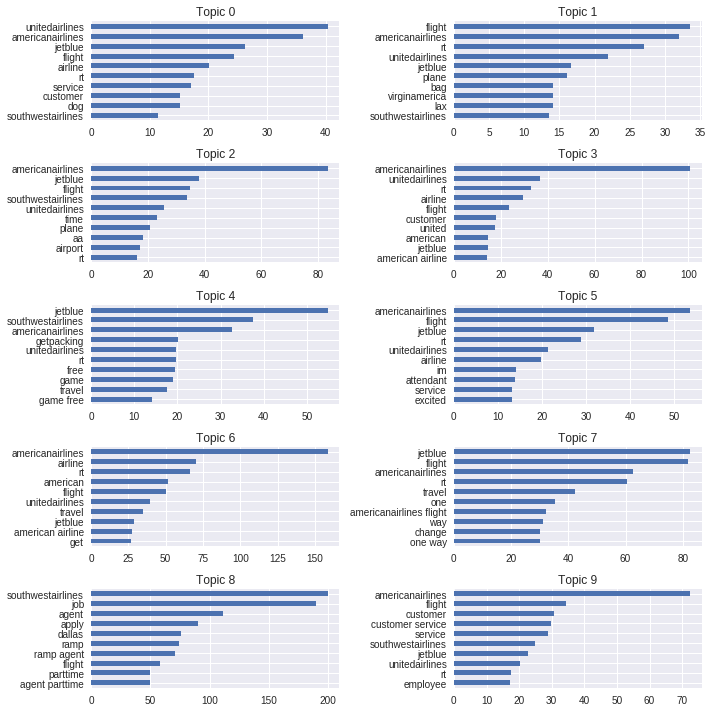

In [72]:
# All classes corpus.
file2save_model = data_out_dir+'LDASKL_model_pulledTweets_corpus.obj'
file2saveVectorizer = data_out_dir+'CV_pulledTweets_corpus.obj'
file2saveTopicPlot = img_out_dir+'TopicPlot_pulledTweets_corpus'
plot_title = "LDA topics for data: major airlines, hashtag referenced tweets, pulled from twitter"
LDA_diff_corpuses(air_df['lemma_stopw_clean_text'], file2save_model, file2saveVectorizer, file2saveTopicPlot)

## Let's display topics by document (text, tweet...)

In [101]:
# read in pickled models.
# lDA_model_allcl = gu.read_pickle_obj(data_out_dir+'LDASKL_model_all_classes_corpus.obj')
# vect_allcl = gu.read_pickle_obj(data_out_dir+'CV_all_classes_corpus.obj')

# lDA_model_pos = gu.read_pickle_obj(data_out_dir+'LDASKL_model_positive_class_corpus.obj')
# vect_pos = gu.read_pickle_obj(data_out_dir+'CV_positive_class_corpus.obj')

# lDA_model_neg = gu.read_pickle_obj(data_out_dir+'LDASKL_model_negative_class_corpus.obj')
# vect_neg = gu.read_pickle_obj(data_out_dir+'CV_negative_class_corpus.obj')

# lDA_model_net = gu.read_pickle_obj(data_out_dir+'LDASKL_model_neutral_class_corpus.obj')
# vect_neut = gu.read_pickle_obj(data_out_dir+'CV_neutral_class_corpus.obj')

In [102]:
# all classes data.

In [ ]:
cleaned_corpus = air_df['lemma_stopw_clean_text']
dtm = vect_allcl.transform(cleaned_corpus)
comp = lDA_model_allcl.transform(test2)

In [123]:
document_topics = pd.DataFrame(comp, columns=["topic %d" % i for i in range(comp.shape[1])])
document_topics.head(5)

topic 0   topic 1   topic 2   topic 3   topic 4   topic 5   topic 6  \
0  0.050006  0.050009  0.050009  0.050012  0.050006  0.549939  0.050008   
1  0.005001  0.005000  0.954994  0.005001  0.005000  0.005001  0.005000   
2  0.012501  0.012501  0.012502  0.012501  0.012501  0.012502  0.887486   
3  0.003847  0.003847  0.965379  0.003847  0.003847  0.003847  0.003847   
4  0.008335  0.924987  0.008335  0.008335  0.008335  0.008335  0.008335   

    topic 7   topic 8   topic 9  
0  0.050004  0.050003  0.050004  
1  0.005000  0.005001  0.005001  
2  0.012502  0.012501  0.012502  
3  0.003847  0.003847  0.003847  
4  0.008334  0.008335  0.008334

## Let's take a look at the highest rated topic 0 documents¶

In [119]:
top_topics = document_topics['topic 0'] > .8
top_docs_topic_0 = document_topics[top_topics]
top_docs_topic_0.head(5)

topic 0   topic 1   topic 2   topic 3   topic 4   topic 5   topic 6  \
27  0.962496  0.004167  0.004167  0.004167  0.004167  0.004167  0.004167   
32  0.887479  0.012502  0.012503  0.012503  0.012502  0.012502  0.012502   
42  0.943745  0.006251  0.006251  0.006250  0.006250  0.006251  0.006251   
64  0.959085  0.004546  0.004546  0.004546  0.004546  0.004546  0.004547   
80  0.959086  0.004546  0.004546  0.004546  0.004546  0.004546  0.004546   

     topic 7   topic 8   topic 9  
27  0.004167  0.004167  0.004167  
32  0.012501  0.012503  0.012502  
42  0.006250  0.006251  0.006250  
64  0.004546  0.004546  0.004546  
80  0.004546  0.004546  0.004546

In [121]:
cleaned_corpus[top_docs_topic_0.index.values[:10]]

27     plz help win bid upgrade flight 227 laxgtsea e...
32                                wish flew atlanta soon
42     heyyyy guyyyys trying get hour someone call pl...
64     website btw new website isnt great user experi...
80     beautiful frontend design right cool still boo...
93           another delayed flight likingyoulessandless
118    normal receive reply central baggage baggageis...
120                             jump dallasaustin market
123             begin dallasaustin flight april 889 ketr
124    congrats got business ewr sfolax fuck fl1289 s...
Name: lemma_stopw_clean_text, dtype: object

## Let's check out the documents within the source content¶

In [124]:
top_documents = top_docs_topic_0.index.values
cleaned_corpus[top_documents].head(10)

27     plz help win bid upgrade flight 227 laxgtsea e...
32                                wish flew atlanta soon
42     heyyyy guyyyys trying get hour someone call pl...
64     website btw new website isnt great user experi...
80     beautiful frontend design right cool still boo...
93           another delayed flight likingyoulessandless
118    normal receive reply central baggage baggageis...
120                             jump dallasaustin market
123             begin dallasaustin flight april 889 ketr
124    congrats got business ewr sfolax fuck fl1289 s...
Name: lemma_stopw_clean_text, dtype: object

In [ ]:
# Note: In sklearn we get pseudocounts. In Gensim, we get probabilities.

In [ ]:
# Credits: Dave's LDA lesson.

In [ ]:
# I can cotinue to look into this and study it with unclassified data.
# pull tweets, use unsupervised learning method LDA, to identify topics within the corpus of tweets.